In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [10]:
# Import the dataset
df = pd.read_csv('epa-sea-level.csv')

In [11]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


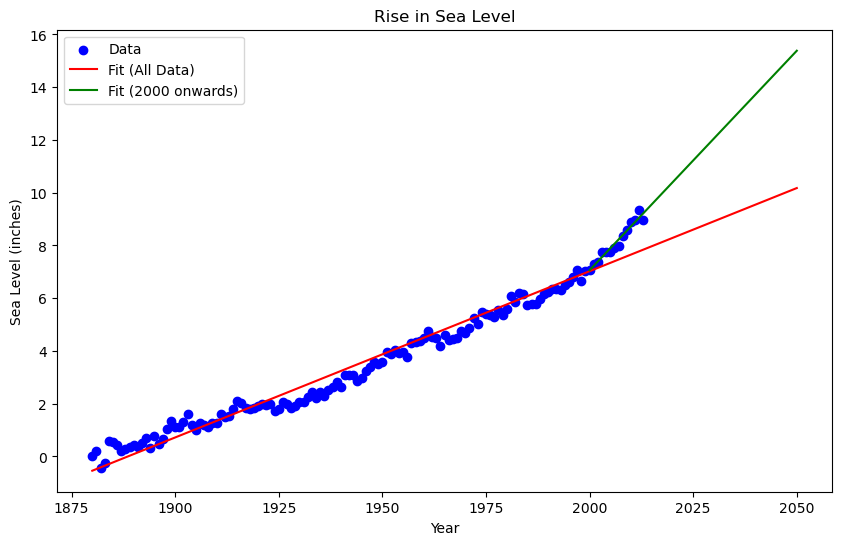

In [12]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Data', color='blue')

# Line of best fit using all data
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
years_extended = range(df['Year'].min(), 2051)
sea_levels_extended = slope * pd.Series(years_extended) + intercept
plt.plot(years_extended, sea_levels_extended, 'r', label='Fit (All Data)')

# Line of best fit for recent data
df_recent = df[df['Year'] >= 2000]
slope_recent, intercept_recent, r_value_recent, p_value_recent, std_err_recent = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
years_recent_extended = range(2000, 2051)
sea_levels_recent_extended = slope_recent * pd.Series(years_recent_extended) + intercept_recent
plt.plot(years_recent_extended, sea_levels_recent_extended, 'g', label='Fit (2000 onwards)')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()

# Save and display the plot
plt.savefig('sea_level_rise.png')
plt.show()
